In [121]:
# Library to plot a graphs
import matplotlib.pyplot as plt
# Libarary to create nested dictionary 
from collections import defaultdict
# Create premutation 
from itertools import permutations
# Library for regex expressions 
import re
# Math library
import math


class Graph:
    '''
    Graph class that accpets file path as an argument
    '''
    
    def __init__(self, path):
        # Coordinates of all nodes in the graph
        self._coordinates = self.read_tsp_file(path)
        # List of all nodes 
        self._cities = [*self._coordinates.keys()]
        # Total number of nodes
        self._size = len(self._cities)
        # Distances between each nodes in the graph
        self._distances = self.compute_distances()
        # Costs of each complete tour
        self.tour_costs = {}


    def read_tsp_file(self, path):
        """"
        Read TSP file
        """
        city_list = []

        with open(path, 'r') as f:
            _data = re.findall(r'\n([0-9].*)', f.read())

        # Split each line by space and convert to float
        for line in _data:
            city_list.append(tuple(map(float, line.split())))
        return { int(vertex): (x,y) for vertex, x, y in city_list }
    
    
    def euclidean_distance(self, cityA, cityB):
        """
        Formula to calculate the Euclidean distance 
        """
        
        x1 = self._coordinates[cityA][0]
        y1 = self._coordinates[cityA][1]
        x2 = self._coordinates[cityB][0]
        y2 = self._coordinates[cityB][1]
        return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    
    
    def compute_distances(self):
        """
        Compute distance method invokes at initialization and calculates the cost of each edge in the graph
        """
        self.distances = defaultdict(dict)
        for cityA in self._cities:
            for cityB in self._cities:
                if cityA != cityB and cityB not in self.distances[cityA]:
                    distance = self.euclidean_distance(cityA, cityB)
                    self.distances[cityA][cityB] = round(distance, 2)
                    self.distances[cityB][cityA] = round(distance, 2)   
        return self.distances
    
    
    def total_distance(self, tour):
        """
        Calculate total distance by passing completed tour 
        For example: [1, 2, 3, 4, 1]
        """
        total_distance = 0
        for i in range(1, len(tour)):
            total_distance += graph._distances[tour[i-1]][tour[i]]
        return total_distance


    def get_all_permutation(self):
        """
        Generate a list of all possible permutation with 
        where first and last element matches
        """
        perm = list(permutations(self._cities))

        # Add inital city to the tour
        for i in range(len(perm)):
            perm[i] = (*perm[i], perm[i][0])
        return perm


    def calculate_all_tours(self, tour_list):
        """
        Calculate the cost of each tour
        """
        for tour in tour_list:
            self.tour_costs[tour] = round(self.total_distance(tour),2)
        return self.tour_costs


    def get_best_tour(self):
        """
        Find a tour with minumum cost and return a tuple with a tour and its weight
        """
        best_tour = min(self.tour_costs, key=self.tour_costs.get)
        return (best_tour, self.tour_costs[best_tour])

    
    def plot_graph(self, tour):
        """
        Plot a graph 
        """
        x = []
        y = []
        for i in tour:
            x.append(self._coordinates[i][0])
            y.append(self._coordinates[i][1])
        plt.plot(x, y, 'xb-')


Best tour: (1, 3, 2, 4, 1) with total cost: 215.09
CPU times: user 20.5 ms, sys: 3.88 ms, total: 24.4 ms
Wall time: 21.8 ms


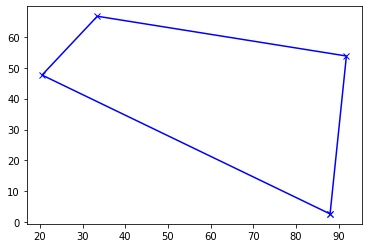

In [113]:
%%time
# Instansiate a graph instance
graph = Graph('tsp_files/Random4.tsp')
# Generate all posible premutations
all_premutation = graph.get_all_permutation()
graph.calculate_all_tours(all_premutation)
best_tour = graph.get_best_tour()

print(f'\nBest tour: {best_tour[0]} with total cost: {best_tour[1]}')
graph.plot_graph(best_tour[0])


Best tour: (1, 2, 5, 3, 4, 1) with total cost: 139.13
CPU times: user 18.5 ms, sys: 2.3 ms, total: 20.8 ms
Wall time: 20.3 ms


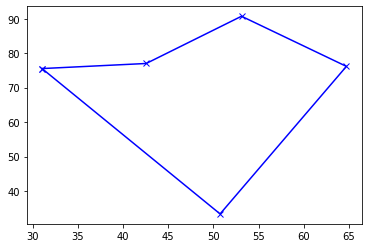

In [114]:
%%time
# Instansiate a graph instance
graph = Graph('tsp_files/Random5.tsp')
# Generate all posible premutations
all_premutation = graph.get_all_permutation()
graph.calculate_all_tours(all_premutation)
best_tour = graph.get_best_tour()

print(f'\nBest tour: {best_tour[0]} with total cost: {best_tour[1]}')
graph.plot_graph(best_tour[0])


Best tour: (1, 2, 3, 4, 5, 6, 1) with total cost: 118.98
CPU times: user 20 ms, sys: 3.27 ms, total: 23.2 ms
Wall time: 21.4 ms


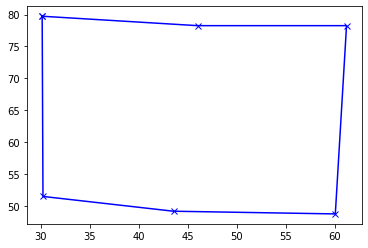

In [115]:
%%time
# Instansiate a graph instance
graph = Graph('tsp_files/Random6.tsp')
# Generate all posible premutations
all_premutation = graph.get_all_permutation()
graph.calculate_all_tours(all_premutation)
best_tour = graph.get_best_tour()

print(f'\nBest tour: {best_tour[0]} with total cost: {best_tour[1]}')
graph.plot_graph(best_tour[0])


Best tour: (1, 2, 7, 3, 6, 5, 4, 1) with total cost: 63.86
CPU times: user 38.4 ms, sys: 3.24 ms, total: 41.6 ms
Wall time: 40.6 ms


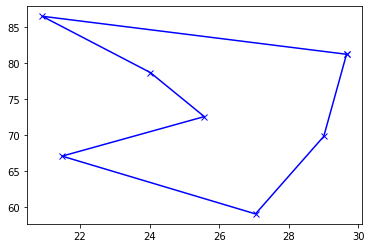

In [116]:
%%time
# Instansiate a graph instance
graph = Graph('tsp_files/Random7.tsp')
# Generate all posible premutations
all_premutation = graph.get_all_permutation()
graph.calculate_all_tours(all_premutation)
best_tour = graph.get_best_tour()

print(f'\nBest tour: {best_tour[0]} with total cost: {best_tour[1]}')
graph.plot_graph(best_tour[0])


Best tour: (1, 6, 8, 4, 5, 2, 3, 7, 1) with total cost: 310.99
CPU times: user 248 ms, sys: 5.24 ms, total: 253 ms
Wall time: 253 ms


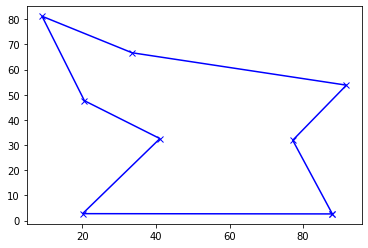

In [117]:
%%time
# Instansiate a graph instance
graph = Graph('tsp_files/Random8.tsp')
# Generate all posible premutations
all_premutation = graph.get_all_permutation()
graph.calculate_all_tours(all_premutation)
best_tour = graph.get_best_tour()

print(f'\nBest tour: {best_tour[0]} with total cost: {best_tour[1]}')
graph.plot_graph(best_tour[0])


Best tour: (1, 7, 6, 3, 5, 2, 9, 4, 8, 1) with total cost: 131.04
CPU times: user 1.6 s, sys: 42.7 ms, total: 1.65 s
Wall time: 1.65 s


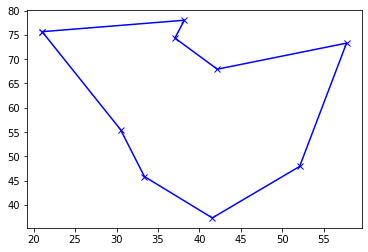

In [118]:
%%time
# Instansiate a graph instance
graph = Graph('tsp_files/Random9.tsp')
# Generate all posible premutations
all_premutation = graph.get_all_permutation()
graph.calculate_all_tours(all_premutation)
best_tour = graph.get_best_tour()

print(f'\nBest tour: {best_tour[0]} with total cost: {best_tour[1]}')
graph.plot_graph(best_tour[0])


Best tour: (1, 2, 7, 6, 8, 5, 9, 10, 4, 3, 1) with total cost: 106.79
CPU times: user 17.5 s, sys: 415 ms, total: 17.9 s
Wall time: 18.1 s


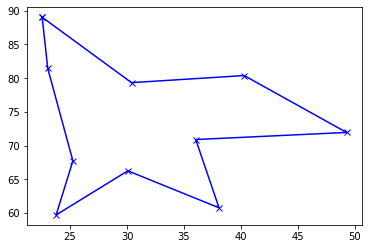

In [119]:
%%time
# Instansiate a graph instance
graph = Graph('tsp_files/Random10.tsp')
# Generate all posible premutations
all_premutation = graph.get_all_permutation()
graph.calculate_all_tours(all_premutation)
best_tour = graph.get_best_tour()

print(f'\nBest tour: {best_tour[0]} with total cost: {best_tour[1]}')
graph.plot_graph(best_tour[0])